<a href="https://colab.research.google.com/github/adalves-ufabc/2023.Q3-PLN/blob/main/2023_Q3_PLN_AULA_16_Notebook_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Processamento de Linguagem Natural [2023.Q3]**
Prof. Alexandre Donizeti Alves

## **Grandes Modelos de Linguagem**
---


*Large Language Models (LLM)*

# Agrupamento de Textos com apoio de LLM

## Conjunto de dados

Vamos usar uma base de *tweets* para praticar.

Download e leitura da base de dados

In [1]:
!gdown --id 1Hd0ytKZrR3s22FheUJt4EZOpZ4eWyTrN

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1Hd0ytKZrR3s22FheUJt4EZOpZ4eWyTrN
To: /content/tweets_corona_virus.zip
100% 4.60M/4.60M [00:00<00:00, 27.4MB/s]


In [2]:
!unzip tweets_corona_virus.zip

Archive:  tweets_corona_virus.zip
  inflating: Corona_NLP_test.csv     
  inflating: Corona_NLP_train.csv    


In [3]:
import pandas as pd

df_tweets = pd.read_csv('Corona_NLP_train.csv',encoding = "ISO-8859-1")
df_tweets

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative
...,...,...,...,...,...,...
41152,44951,89903,"Wellington City, New Zealand",14-04-2020,Airline pilots offering to stock supermarket s...,Neutral
41153,44952,89904,NaN,14-04-2020,Response to complaint not provided citing COVI...,Extremely Negative
41154,44953,89905,NaN,14-04-2020,You know itÂs getting tough when @KameronWild...,Positive
41155,44954,89906,NaN,14-04-2020,Is it wrong that the smell of hand sanitizer i...,Neutral


Instalando um *encoder* (`sbert`) para geração de `embeddings` dos dados textuais:

In [4]:
!pip install -U sentence-transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 2.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 20.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 45.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 37.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 58.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 64.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 37.5 MB/s eta 0:00:00
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125923 sha256=a5a0c592a57d2cf000cc37f46cdce4523a4c733891b57c1d667fda83aac7cf95
  Stored in directory: /root/.cache/pip/wheels/62/f2/10/1e606fd5f02395388f74e7462910fe851042f97238cbbd902f
Successfully built sentence-transformers


Carregando um modelo pré-treinado para geração de *embeddings*.
Esse modelo é multilingual e oferece suporte para português e inglês.

In [5]:
from sentence_transformers import SentenceTransformer

model = SentenceTransformer('paraphrase-multilingual-MiniLM-L12-v2')

Agora, estamos mapeando os textos para um espaço latente (*embeddings*).

Cada *tweet* será mapeado para um espaço vetorial de `384 dimensões`.

In [6]:
embeddings =  model.encode(df_tweets.OriginalTweet.to_list())

In [7]:
embeddings.shape

(41157, 384)

Aqui, podemos gerar um `grafo`. Cada *tweet* é um vértice e as arestas são geradas pela **dissimilaridade de cosseno**.

In [8]:
from sklearn.neighbors import kneighbors_graph
from sklearn.neighbors import radius_neighbors_graph

import numpy as np
import networkx as nx

A = radius_neighbors_graph(embeddings, 0.2, metric='cosine',  include_self=False, mode='distance')

G = nx.Graph(A.toarray())

In [9]:
G.number_of_nodes()

41157

In [10]:
G.number_of_edges()

40660

Além do grafo, vamos gerar um agrupamento dos *tweets*.

No exemplo abaixo, geramos 10 clusters. Faça alterações aqui para explorar novas soluções.

In [11]:
from sklearn.cluster import KMeans
import numpy as np

kmeans = KMeans(n_clusters=10, random_state=0, n_init="auto").fit(embeddings)
df_tweets['cluster_label'] = kmeans.labels_

In [12]:
Tdf_tweets

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,cluster_label
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,0
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive,9
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive,3
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive,8
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative,3
...,...,...,...,...,...,...,...
41152,44951,89903,"Wellington City, New Zealand",14-04-2020,Airline pilots offering to stock supermarket s...,Neutral,1
41153,44952,89904,NaN,14-04-2020,Response to complaint not provided citing COVI...,Extremely Negative,2
41154,44953,89905,NaN,14-04-2020,You know itÂs getting tough when @KameronWild...,Positive,5
41155,44954,89906,NaN,14-04-2020,Is it wrong that the smell of hand sanitizer i...,Neutral,6


Vamos adicionar a informação de cluster nos vértices do grafo.

In [13]:
for node_id,row in df_tweets.iterrows():
  G.nodes[node_id]['topic'] = 'cluster_'+str(row['cluster_label'])

Alternativamente, podemos adicionar informação de tempo (data que o *tweet* foi publicado) nos vértices do grafo.

In [14]:
for node_id,row in df_tweets.iterrows():
  G.nodes[node_id]['time'] = row['TweetAt']

Finalmente, vamos preparar os arquivos para visualizar o grafo, junto com a informação de agrupamento. Assim, finalizamos a primeira etapa da proposta.


In [15]:
from sentence_transformers import SentenceTransformer, util
from tqdm.notebook import tqdm

L_edges = []
for edge in tqdm(G.edges()):
  L_edges.append([G.nodes[edge[0]]['time'],edge[0],edge[1],1.0])

  0%|          | 0/40660 [00:00<?, ?it/s]

In [16]:
df_edges = pd.DataFrame(L_edges)
df_edges.columns = ['time', 'source', 'target', 'value']
df_edges

,time,source,target,value
0,16-03-2020,2,262,1.0
1,16-03-2020,3,14523,1.0
2,16-03-2020,4,39,1.0
3,16-03-2020,4,1410,1.0
4,16-03-2020,4,2029,1.0
...,...,...,...,...
40655,14-04-2020,40896,41064,1.0
40656,14-04-2020,41007,41034,1.0
40657,14-04-2020,41032,41092,1.0
40658,14-04-2020,41062,41063,1.0


In [17]:
import re

L_nodes = []
for node in G.nodes():
  tweet = re.sub(r"[^a-zA-Z0-9]+", ' ', df_tweets.iloc[node].OriginalTweet)[0:100]
  sentiment = re.sub(r"[^a-zA-Z0-9]+", ' ', df_tweets.iloc[node].Sentiment)[0:100]
  L_nodes.append([node,G.nodes[node]['topic'],tweet,sentiment])

In [18]:
df_nodes = pd.DataFrame(L_nodes)
df_nodes.columns = ['id','topic','tweet','sentiment']
df_nodes

,id,topic,tweet,sentiment
0,0,cluster_0,MeNyrbie Phil Gahan Chrisitv https t co iFz9F...,Neutral
1,1,cluster_9,advice Talk to your neighbours family to excha...,Positive
2,2,cluster_3,Coronavirus Australia Woolworths to give elder...,Positive
3,3,cluster_8,My food stock is not the only one which is emp...,Positive
4,4,cluster_3,Me ready to go at supermarket during the COVID...,Extremely Negative
...,...,...,...,...
41152,41152,cluster_1,Airline pilots offering to stock supermarket s...,Neutral
41153,41153,cluster_2,Response to complaint not provided citing COVI...,Extremely Negative
41154,41154,cluster_5,You know it s getting tough when KameronWilds ...,Positive
41155,41155,cluster_6,Is it wrong that the smell of hand sanitizer i...,Neutral


## Limitações encontradas


* Dificuldade em estimar o número de grupos
* Interpretabilidade dos grupos

Como podemos melhorar essa tarefa usando LLMs?

# Conceitos básicos sobre Modelos de Linguagem

Fonte: https://stanford-cs324.github.io/winter2022/lectures/introduction/



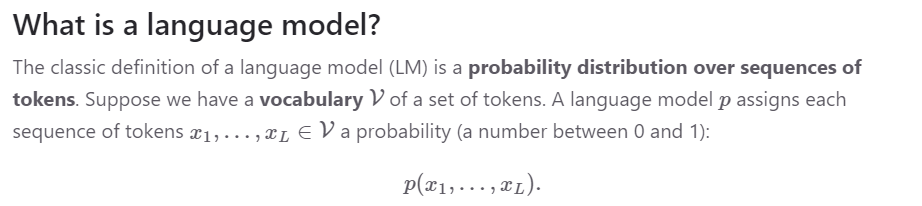

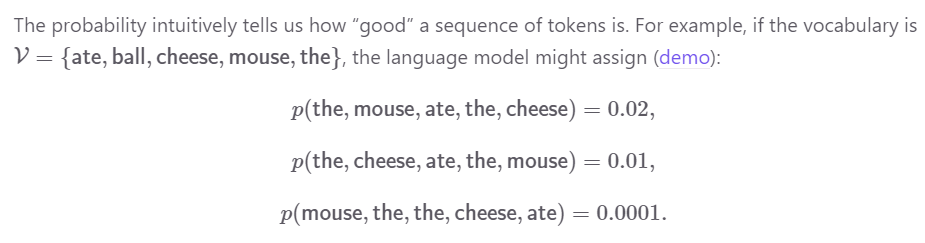

## Neural Language Model

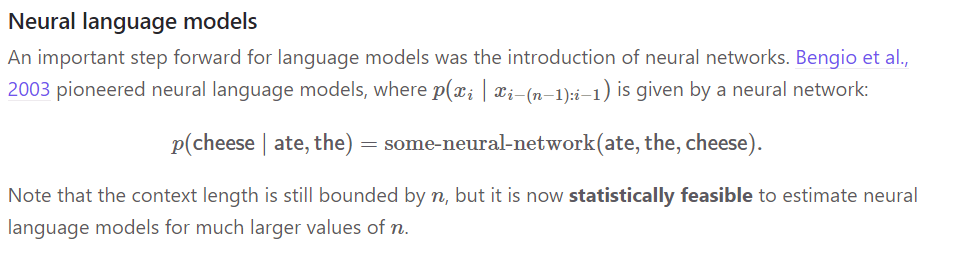

Tomar nota: é necessário um tamanho de contexto para treinamento.

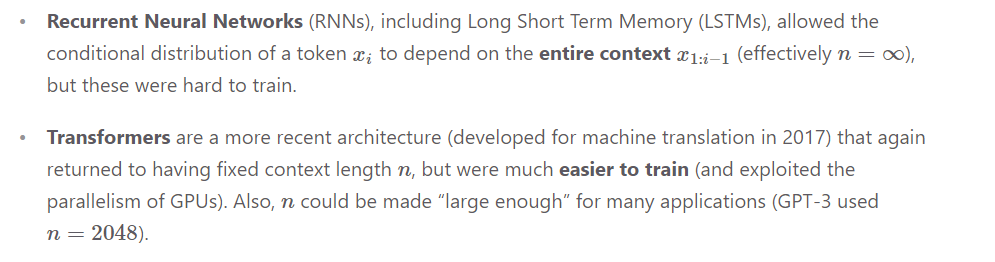

## Probabilidade da próxima palavra da sequência

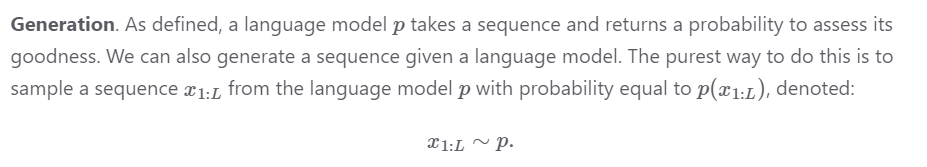

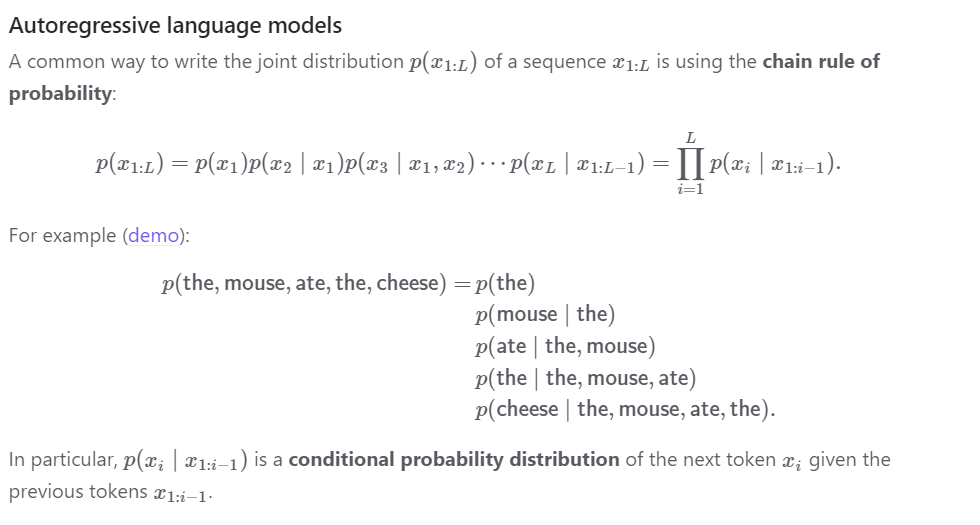

## Escolhendo a próxima palavra (temperatura do modelo)

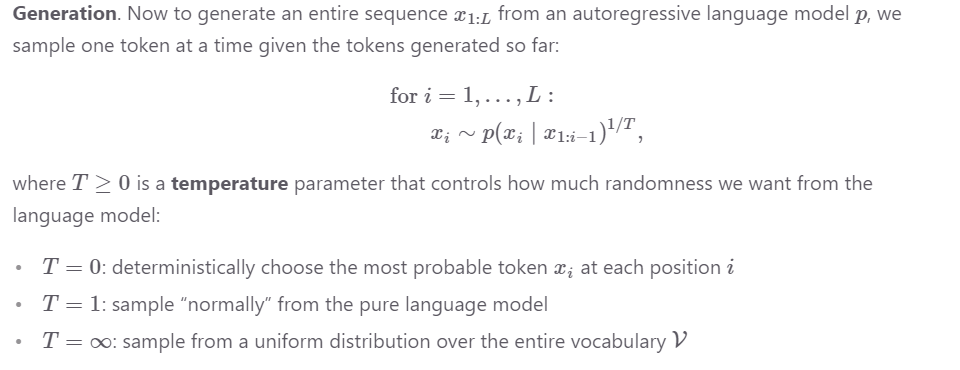

## Prompts: condicionando a geração da próxima palavra

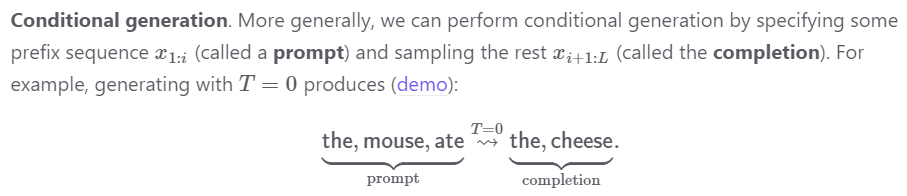

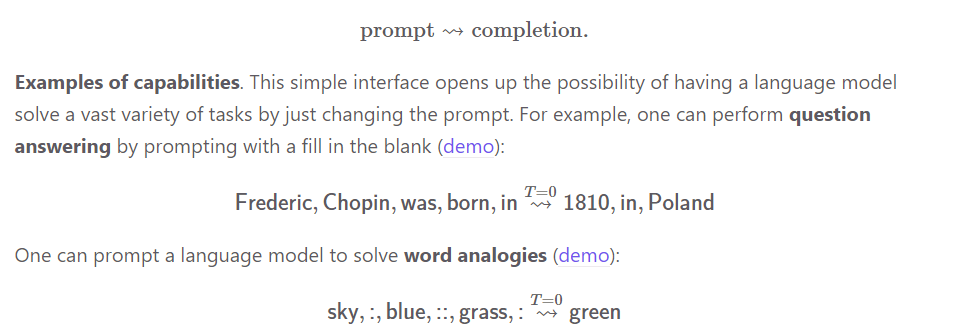

# Emergence in Large Language Models

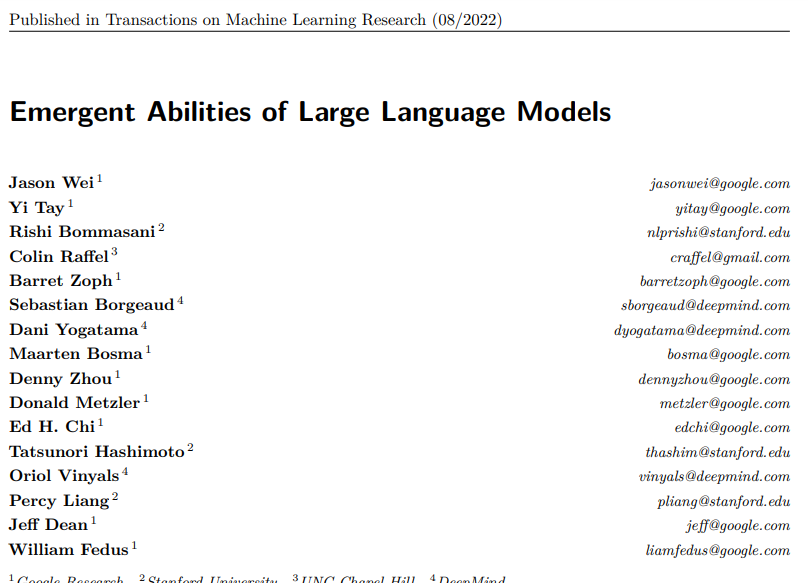

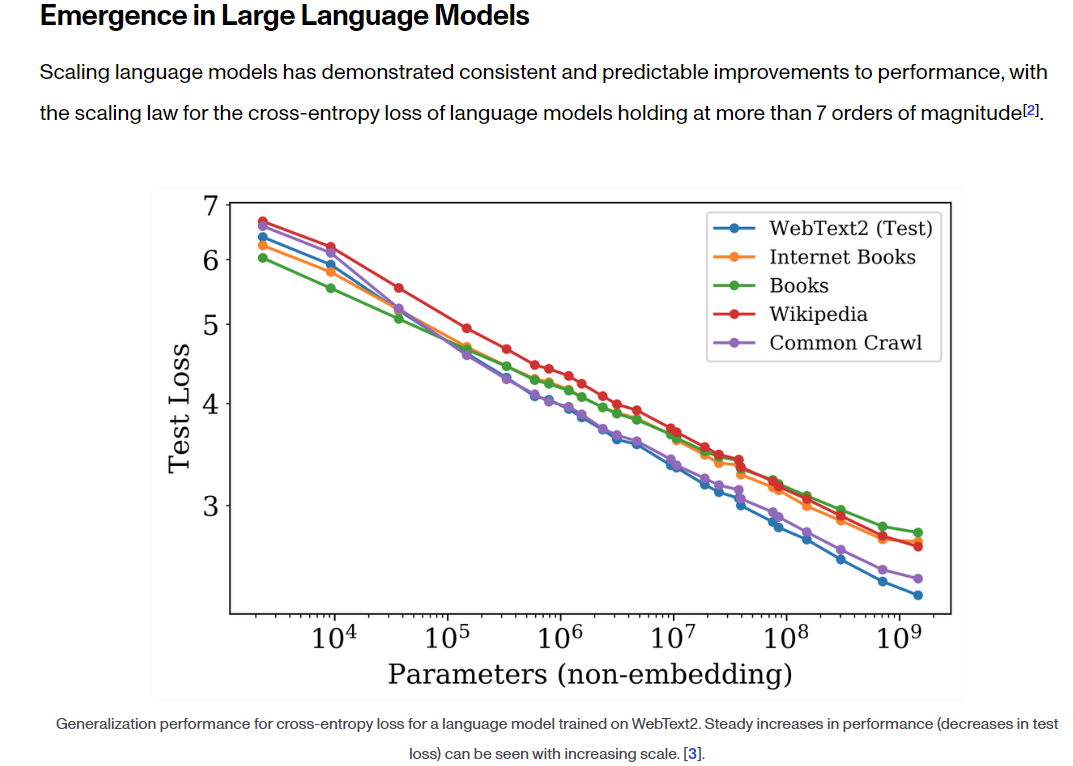

<img src="https://blogger.googleusercontent.com/img/b/R29vZ2xl/AVvXsEgLXCWMlipdu0gFF6hsiJHbxg1zSaEkdDWfl-8RakQuW__8RPvlOS9KGIScNCytxT4jz9isnx0GLMwbS1G0Q4WdXzT42GszgfwIIAVX1H3J-43lVWWqcb--q9cPsxCsJFFz2dRfpKgEmLe-xfIyBqQuPq1BPYcK9CtAK1_xnhgvgAAx0GeZmODJxGNMYQ/s1600/image8.gif">

## Limites: Lei de Escala

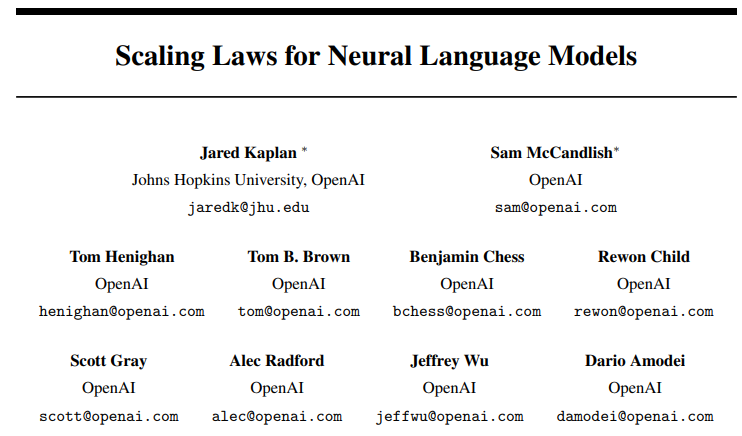

Exemplo:

Estudos sobre Lei de Escala da OpenAI e da DeepMind para um hipotético modelo de 100T de parâmetros.

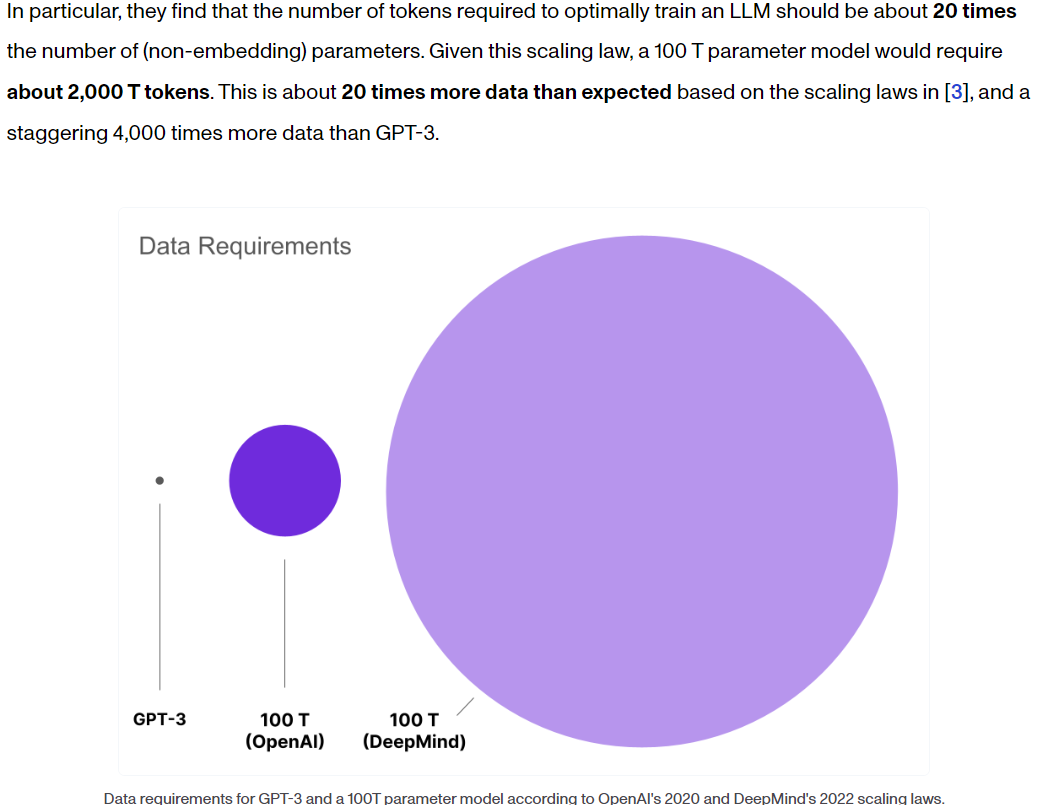

*While the amount of data generated every day grows year over year, only a fraction is stored, textual, available, and suitable for training. Combining this fact with hardware and cost limitations means that scaling models to such astronomical sizes to search for emergent abilities is impractical at this point.*

https://www.assemblyai.com/blog/emergent-abilities-of-large-language-models/

## Limites: Tamanho do Contexto

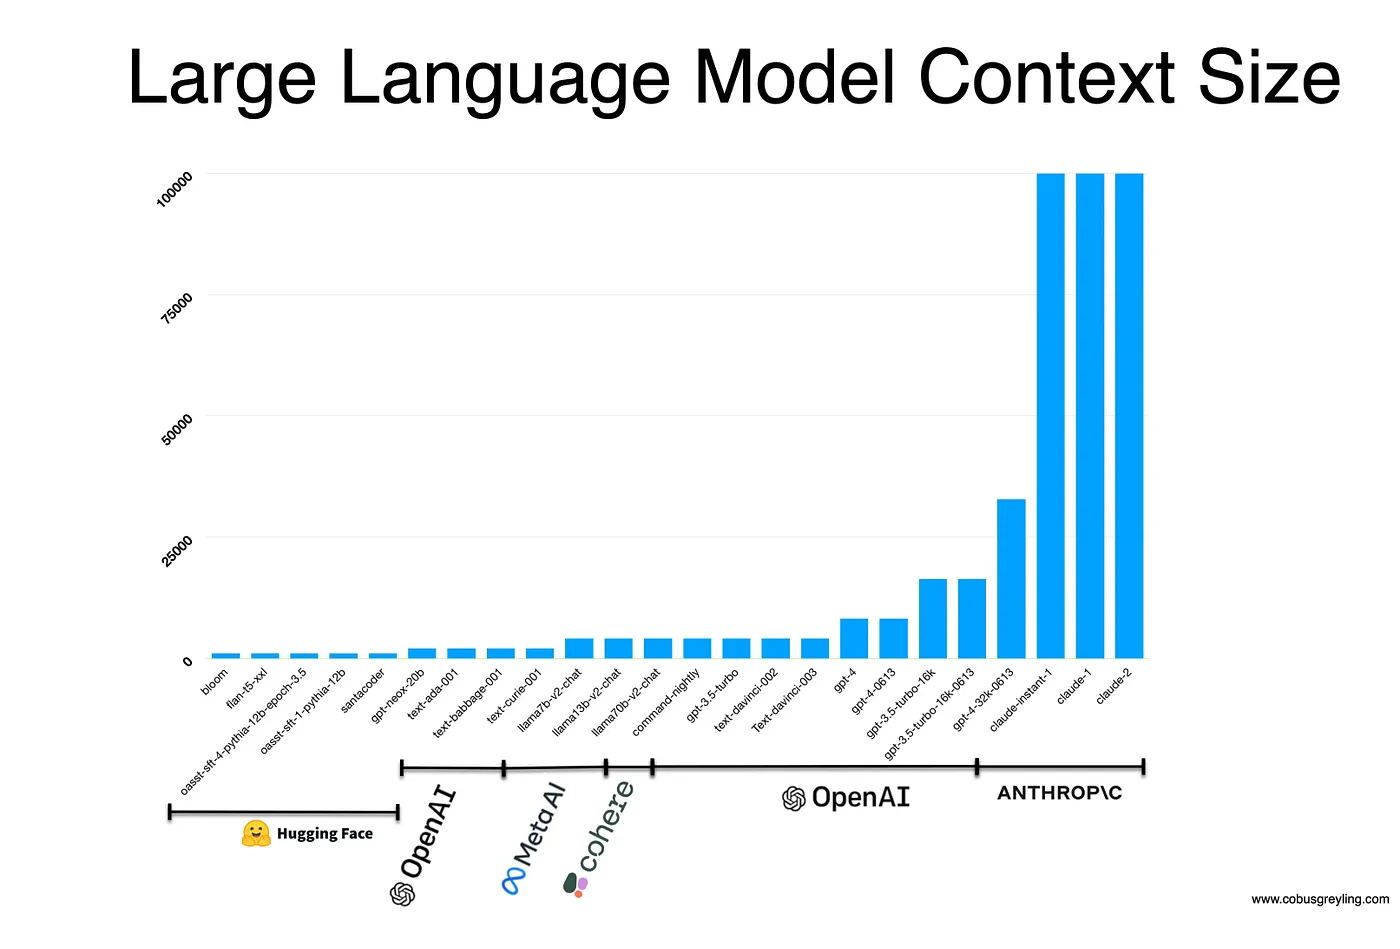

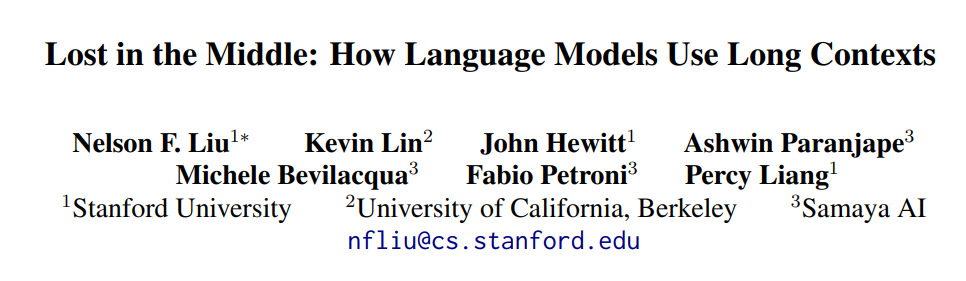

* *We find that performance is often
highest when relevant information occurs at the
beginning or end of the input context, and significantly degrades when models must access
relevant information in the middle of long contexts.*
* *Performance substantially
decreases as the input context grows longer,
even for explicitly long-context models.*

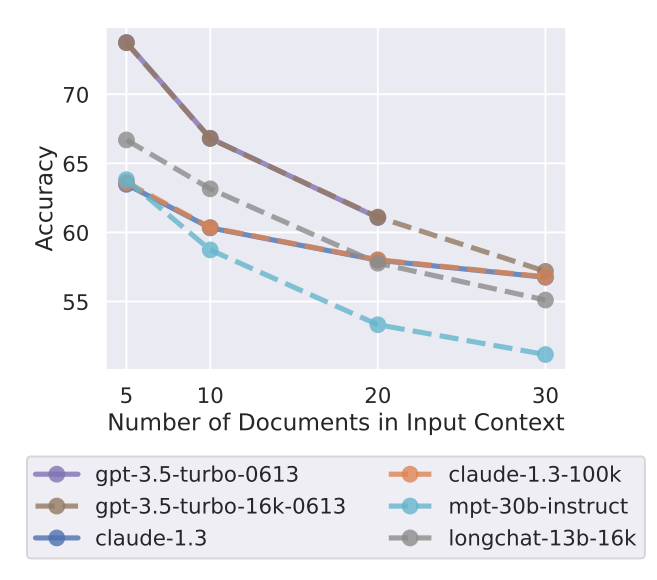

**IMPORTANTE:**

Mesmo em um cenário hipotético, sem restrições de tamanho de contexto, tentativas de *prompts* para agrupamento de textos usando apenas LLMs são desencorajadas.

# Como LLMs podem apoiar tarefas de mineração de dados e textos?

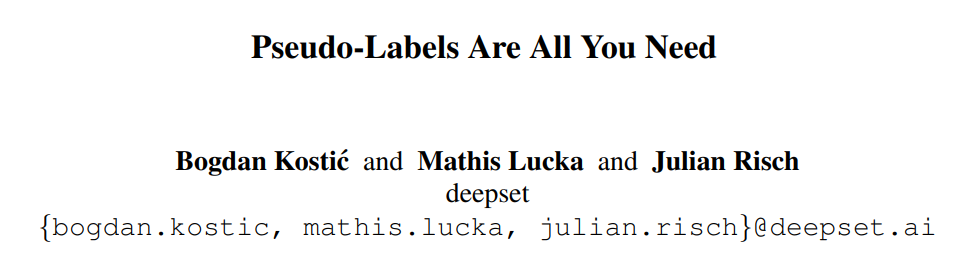

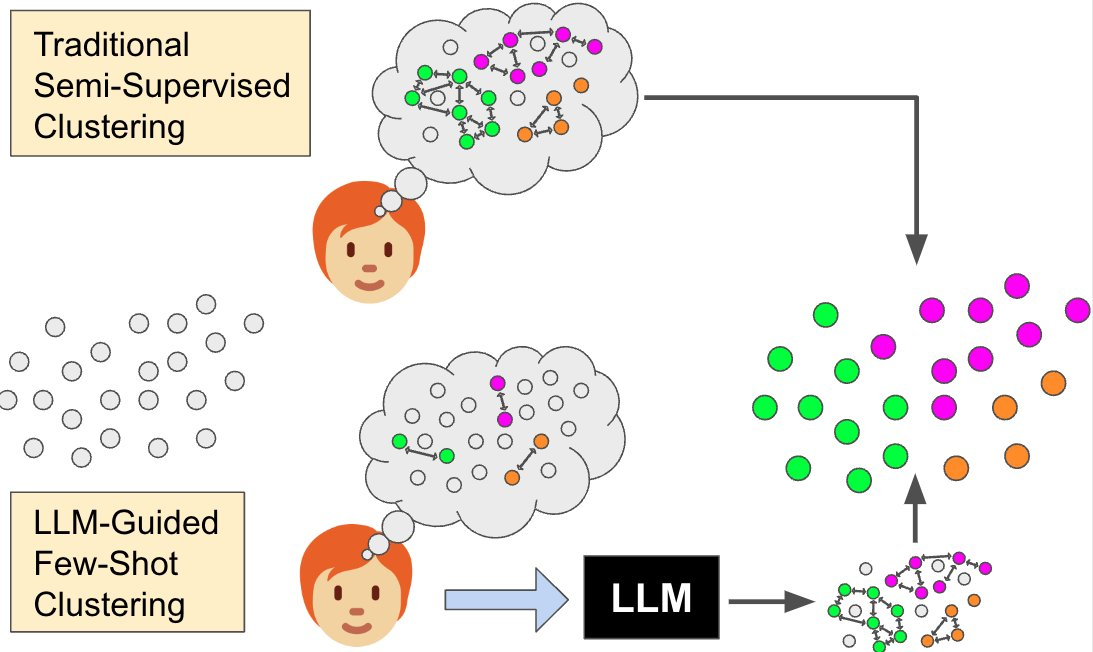

## Vamos incorporar *feedback* de LLMs para apoiar o agrupamento.

Nós iremos escolher alguns representantes de cada grupo.

Os representante geram uma amostra da base de *tweets*.

Por ser uma amostra pequena, podemos pedir para um LLM gerar um agrupamento inicial para nós.

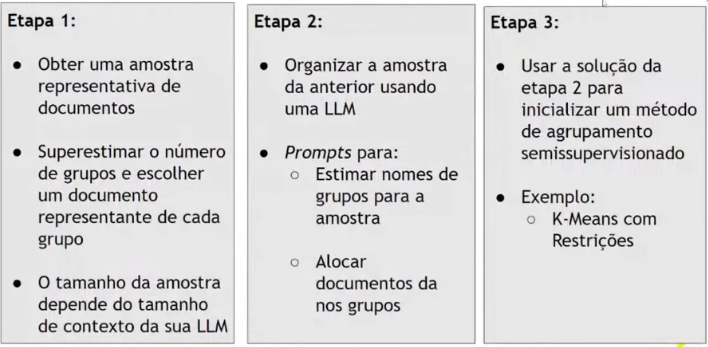

In [19]:
from sklearn.neighbors import NearestNeighbors
import numpy as np

nbrs = NearestNeighbors(n_neighbors=1, algorithm='ball_tree').fit(embeddings)
distances, indices = nbrs.kneighbors(kmeans.cluster_centers_)

Documentos (100) mais representativos:

In [20]:
for index,row in df_tweets.iloc[indices.reshape(indices.shape[0])].iterrows():
  print("DocumentID =",index)
  print(row['OriginalTweet'])
  print("=======")

print("")

DocumentID = 7656
IK. KOM. NIET. MEER. BIJ. https://t.co/aos0KAYjfr
DocumentID = 6500
So...if you happen to goto the grocery store &amp; are confronted by masses of idiots (wearing pjs) stocking up...look around, I bet most of them would do just fine if they missed a meal or 2. Just saying. #COVID19ON #coronavirus @BellevilleON
DocumentID = 8978
Yesterday I was on to discuss how COVID 19 is impacting supply chains Short version don t hoard panic buy food and we owe a HUGE thanks to all the businesses and workers that are keeping goods moving in difficult circumstances
DocumentID = 37304

?https://t.co/MWmerxxsab #DIY
DocumentID = 1638
ZÃ¡sah policie proti spekulant?m s rouÂkami. Na m?j popud hejtman ÃsteckÃ©ho kraje ve spoluprÃ¡ci s @PolicieCZ podle krizovÃ©ho zÃ¡kona zajistil tÃ©m?? 700 tis.rouÂek od firmy, kterÃ¡ je m?la dodat na zdravotnÃ­k?m, ale na poslednÃ­ chvÃ­li se snaÂila navyÂovat cenu. #spolutozvladneme
DocumentID = 1697



#fbp #RETWEEET #whyhasgodforsakenme #tolietpa

Aqui é o resultado que o LLM nos proporcionou ao pedir (via *prompt*) um agrupamento da amostra acima.

No vídeo, discutimos abordagens diferentes em como explorar o LLM. Atenção: depende uma chave, se você for usar um LLM privado (e.g. ChatGPT)

In [21]:
import json

jsonString = '''{
  "Grocery Shopping Amid COVID-19": [4180, 17251, 9146, 13854, 24851, 6500, 16958, 26954, 25907, 26678, 30686, 34706, 9579, 2699, 7927, 30284, 6589, 20539, 23049, 13287, 242, 17220, 25947, 5099, 7656, 4853, 28843, 23686, 21694, 1697, 1638, 40821, 26598, 13244, 25947, 15200, 21320, 39623, 37710, 1059, 6706, 22270, 26484, 32529, 40041, 28479, 36617, 30309, 13281, 242, 11775, 37584, 11213, 32958, 41092, 1638, 16801, 1101, 7656, 13287, 11930, 21320, 19411, 32161, 39563],
  "COVID-19 Impact on Food Supply": [14310, 39245, 37584, 40041, 2946, 37710, 37584, 39406],
  "Grocery Store Safety Measures": [17251, 39245, 16958, 769, 32958],
  "Scams and Price Gouging": [19851, 34706, 15200, 21196],
  "Food Donation and Support": [1441, 28479],
  "Supply Chain Concerns": [13244, 37584, 37584],
  "Consumer Behavior Changes": [18061, 365, 25947, 21320],
  "Essential Workers Appreciation": [7927, 30309, 41092, 37607],
  "Hygiene and Safety Measures": [1934, 11388, 7656, 37584],
  "Business Impact of COVID-19": [17220, 18757, 28484, 2699, 23511],
  "Price and Cost Concerns": [25907, 26678, 26598, 37584, 26484, 365, 17251],
  "DIY Hand Sanitizer": [22270, 37584],
  "Social Distancing and Shopping": [28465, 3379, 2734, 21320, 1059, 770, 40041, 37710, 675, 7656, 13287, 1441, 32958, 21320],
  "Online Shopping Recommendations": [39623, 37710, 7656, 40041, 28479, 31351],
  "Food Waste Concerns": [21196, 28484, 19411, 21320, 37584],
  "Retail Store Hour Changes": [3237, 37584, 7844],
  "Community Support": [3379, 2734, 39623, 1059, 6706, 26484, 32529, 30309, 13281, 242, 11775, 37584, 11213, 32958, 41092, 1638, 16801, 1101, 7656, 13287, 11930, 21320, 19411, 32161, 39563]
}
'''

llm_supervision = json.loads(jsonString)

llm_supervision

{'Grocery Shopping Amid COVID-19': [4180,
  17251,
  9146,
  13854,
  24851,
  6500,
  16958,
  26954,
  25907,
  26678,
  30686,
  34706,
  9579,
  2699,
  7927,
  30284,
  6589,
  20539,
  23049,
  13287,
  242,
  17220,
  25947,
  5099,
  7656,
  4853,
  28843,
  23686,
  21694,
  1697,
  1638,
  40821,
  26598,
  13244,
  25947,
  15200,
  21320,
  39623,
  37710,
  1059,
  6706,
  22270,
  26484,
  32529,
  40041,
  28479,
  36617,
  30309,
  13281,
  242,
  11775,
  37584,
  11213,
  32958,
  41092,
  1638,
  16801,
  1101,
  7656,
  13287,
  11930,
  21320,
  19411,
  32161,
  39563],
 'COVID-19 Impact on Food Supply': [14310,
  39245,
  37584,
  40041,
  2946,
  37710,
  37584,
  39406],
 'Grocery Store Safety Measures': [17251, 39245, 16958, 769, 32958],
 'Scams and Price Gouging': [19851, 34706, 15200, 21196],
 'Food Donation and Support': [1441, 28479],
 'Supply Chain Concerns': [13244, 37584, 37584],
 'Consumer Behavior Changes': [18061, 365, 25947, 21320],
 'Essential Work

In [22]:
label_cluster_id = {}
cluster_label_id = {}
label_id = 0
for cluster_label in llm_supervision:
  label_cluster_id[cluster_label] = label_id
  cluster_label_id[label_id] = cluster_label
  label_id += 1

label_cluster_id

{'Grocery Shopping Amid COVID-19': 0,
 'COVID-19 Impact on Food Supply': 1,
 'Grocery Store Safety Measures': 2,
 'Scams and Price Gouging': 3,
 'Food Donation and Support': 4,
 'Supply Chain Concerns': 5,
 'Consumer Behavior Changes': 6,
 'Essential Workers Appreciation': 7,
 'Hygiene and Safety Measures': 8,
 'Business Impact of COVID-19': 9,
 'Price and Cost Concerns': 10,
 'DIY Hand Sanitizer': 11,
 'Social Distancing and Shopping': 12,
 'Online Shopping Recommendations': 13,
 'Food Waste Concerns': 14,
 'Retail Store Hour Changes': 15,
 'Community Support': 16}

In [23]:
cluster_label_id

{0: 'Grocery Shopping Amid COVID-19',
 1: 'COVID-19 Impact on Food Supply',
 2: 'Grocery Store Safety Measures',
 3: 'Scams and Price Gouging',
 4: 'Food Donation and Support',
 5: 'Supply Chain Concerns',
 6: 'Consumer Behavior Changes',
 7: 'Essential Workers Appreciation',
 8: 'Hygiene and Safety Measures',
 9: 'Business Impact of COVID-19',
 10: 'Price and Cost Concerns',
 11: 'DIY Hand Sanitizer',
 12: 'Social Distancing and Shopping',
 13: 'Online Shopping Recommendations',
 14: 'Food Waste Concerns',
 15: 'Retail Store Hour Changes',
 16: 'Community Support'}

Agora, vamos instalar um método de agrupamento com restrições.

A ideia é agrupar toda a base textual, mas considerando o agrupamento inicial da LLM como restrições rígidas.

Consulte sobre Constrained KMeans para mais detalhes.

In [24]:
!pip install active-semi-supervised-clustering

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.2/40.2 kB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 4.9 MB/s eta 0:00:00


In [25]:
!pip install ConstrainedKMeans
!pip install bidict

In [26]:
from sklearn import datasets, metrics
from active_semi_clustering.semi_supervised.pairwise_constraints import PCKMeans
from active_semi_clustering.semi_supervised.labeled_data import ConstrainedKMeans
from active_semi_clustering.active.pairwise_constraints import ExampleOracle, ExploreConsolidate, MinMax

init_labels = []
can_change = []
for index,row in df_tweets.iterrows():

  tem=0
  for cluster_label in llm_supervision:
    if index in llm_supervision[cluster_label]: # se verdade, entao foi pre agrupado
      init_labels.append(label_cluster_id[cluster_label])
      can_change.append(0)
      #y_name.append(cluster_label)
      tem=1
      break

  if tem!=1:
    init_labels.append(1000)
    can_change.append(1)

Abaixo, o resultado do constrained KMeans, em que a LLM gerou a restrições.

In [27]:
#from active_semi_clustering.semi_supervised.labeled_data import ConstrainedKMeans
from ConstrainedKMeans import ConstrainedKMeans as CKM

ckm = CKM(n_clusters=len(llm_supervision))
ckm.fit(embeddings, np.array(can_change), np.array(init_labels))
labels = ckm.get_labels()

In [28]:
df_tweets['cluster_ckm'] = labels
df_tweets

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,cluster_label,cluster_ckm
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,0,9.0
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive,9,16.0
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive,3,8.0
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive,8,4.0
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative,3,8.0
...,...,...,...,...,...,...,...,...
41152,44951,89903,"Wellington City, New Zealand",14-04-2020,Airline pilots offering to stock supermarket s...,Neutral,1,6.0
41153,44952,89904,NaN,14-04-2020,Response to complaint not provided citing COVI...,Extremely Negative,2,3.0
41154,44953,89905,NaN,14-04-2020,You know itÂs getting tough when @KameronWild...,Positive,5,15.0
41155,44954,89906,NaN,14-04-2020,Is it wrong that the smell of hand sanitizer i...,Neutral,6,11.0


In [29]:
df_tweets['embeddings'] = list(embeddings)

In [30]:
df_tweets

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,cluster_label,cluster_ckm,embeddings
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,0,9.0,"[-0.06808283, 0.17462339, -0.04126394, -0.1142..."
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive,9,16.0,"[-0.0710702, 0.030669745, -0.087075986, -0.107..."
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive,3,8.0,"[0.26239464, 0.025672052, 0.043556027, 0.15952..."
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive,8,4.0,"[0.19847786, -0.17337762, -0.066879086, 0.0314..."
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative,3,8.0,"[0.28956237, -0.15364204, -0.017433973, -0.104..."
...,...,...,...,...,...,...,...,...,...
41152,44951,89903,"Wellington City, New Zealand",14-04-2020,Airline pilots offering to stock supermarket s...,Neutral,1,6.0,"[0.23264332, -0.06326306, -0.042286992, -0.277..."
41153,44952,89904,NaN,14-04-2020,Response to complaint not provided citing COVI...,Extremely Negative,2,3.0,"[-0.0010476304, 0.38104048, 0.16066267, -0.018..."
41154,44953,89905,NaN,14-04-2020,You know itÂs getting tough when @KameronWild...,Positive,5,15.0,"[-0.16402811, -0.16581814, -0.09560185, -0.408..."
41155,44954,89906,NaN,14-04-2020,Is it wrong that the smell of hand sanitizer i...,Neutral,6,11.0,"[-0.046697486, -0.035694208, 0.2831314, 0.1274..."


Vamos repetir a tarefa de visualização por meio de grafo.

Aqui, decidimos fazer uma adaptação, gerando um grafo por cluster e, em seguida, conectando os grafos.

In [31]:
G_new = nx.Graph()

for cluster_ckm in df_tweets.cluster_ckm.unique():
  df_temp = df_tweets[df_tweets.cluster_ckm==cluster_ckm]

  A = kneighbors_graph(np.array(df_temp.embeddings.to_list()), 2, mode='connectivity', include_self=False)
  G_temp = nx.Graph(A.toarray())
  df_temp['graph_node_id'] = list(range(0,len(df_temp)))
  for edge in G_temp.edges():
    node1 = df_temp[df_temp.graph_node_id==edge[0]].index[0]
    node2 = df_temp[df_temp.graph_node_id==edge[1]].index[0]
    G_new.add_edge(node1,node2)

<ipython-input-31-c3330906749b>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['graph_node_id'] = list(range(0,len(df_temp)))
<ipython-input-31-c3330906749b>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['graph_node_id'] = list(range(0,len(df_temp)))
<ipython-input-31-c3330906749b>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyd

In [32]:
A = radius_neighbors_graph(embeddings, 0.2, metric='cosine',  include_self=False, mode='distance')
G_temp = nx.Graph(A.toarray())
for edge in G_temp.edges():
  G_new.add_edge(edge[0],edge[1])

In [33]:
for node_id,row in df_tweets.iterrows():
  G_new.nodes[node_id]['topic'] = cluster_label_id[int(row['cluster_ckm'])]

In [34]:
for node_id,row in df_tweets.iterrows():
  G_new.nodes[node_id]['time'] = row['TweetAt']

In [35]:
from sentence_transformers import SentenceTransformer, util
from tqdm.notebook import tqdm

L_edges = []
for edge in tqdm(G_new.edges()):
  L_edges.append([G_new.nodes[edge[0]]['time'],edge[0],edge[1],1.0])

  0%|          | 0/102356 [00:00<?, ?it/s]

In [36]:
df_edges = pd.DataFrame(L_edges)
df_edges.columns = ['time', 'source', 'target', 'value']
df_edges

,time,source,target,value
0,16-03-2020,0,31018,1.0
1,16-03-2020,0,35601,1.0
2,16-03-2020,0,414,1.0
3,16-03-2020,0,7319,1.0
4,16-03-2020,0,7466,1.0
...,...,...,...,...
102351,13-04-2020,40808,39914,1.0
102352,13-04-2020,39847,39914,1.0
102353,13-04-2020,40364,40500,1.0
102354,13-04-2020,40364,40510,1.0


In [37]:
import re

L_nodes = []
for node in G_new.nodes():
  tweet = re.sub(r"[^a-zA-Z0-9]+", ' ', df_tweets.iloc[node].OriginalTweet)[0:100]
  sentiment = re.sub(r"[^a-zA-Z0-9]+", ' ', df_tweets.iloc[node].Sentiment)[0:100]
  L_nodes.append([node,G_new.nodes[node]['topic'],tweet,sentiment])

In [38]:
df_nodes = pd.DataFrame(L_nodes)
df_nodes.columns = ['id','topic','tweet','sentiment']
df_nodes

,id,topic,tweet,sentiment
0,0,Business Impact of COVID-19,MeNyrbie Phil Gahan Chrisitv https t co iFz9F...,Neutral
1,31018,Business Impact of COVID-19,Voi taivas varjele https t co 6wNeXbTHvI,Neutral
2,35601,Business Impact of COVID-19,https t co IyTL2vFdnN Here you go,Neutral
3,414,Business Impact of COVID-19,Ryan Holdaway We had the same thought so here...,Neutral
4,7319,Business Impact of COVID-19,bbcqt You need to address this sainsburys asd...,Neutral
...,...,...,...,...
41152,40256,Supply Chain Concerns,PEC Russia and other oil producing nations on ...,Negative
41153,40303,Supply Chain Concerns,Trump s crude problem OPEC diplomacy can t sav...,Negative
41154,40364,Supply Chain Concerns,Opec Russia approve biggest ever oil cut to su...,Positive
41155,40500,Supply Chain Concerns,OPEC Russia approve biggest ever oil cut to su...,Positive


Novamente, use o cosmograph app para visualizar os resultados.

In [39]:
df_edges.to_csv('edges_v2.csv',sep=',')
df_nodes.to_csv('nodes_v2.csv',sep=',')

Também podemos usar a ferramenta Clustering Workbench para visualizar.

In [40]:
df_nodes.to_excel('nodes_v2.xlsx')

**REFERÊNCIA**

---

Notebook adaptado a partir da palestra **Integrando *Large Language Models* (LLM) em Agrupamento de Textos**, ministrada pela professor **Ricardo Marcacini** (ICMC-USP) no MBA em Inteligência
Artificial e Big Data. Os notebooks e material foram gentilmente cedidos pelo professor **Ricardo Marcacini**. Evento transmitido ao vivo em 16 de setembro de 2023.

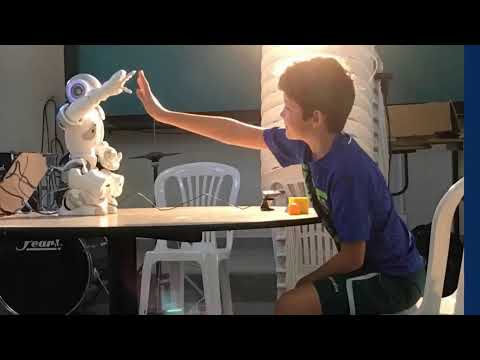

In [ ]:
from IPython.display import YouTubeVideo

display(YouTubeVideo('xkZBNio1-oc', width=550, height=310))